In [4]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model
 
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 


/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [6]:

# 加载数据
dataframe = read_csv('BCHAIN-MKPRU_re.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')     

# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 划分训练集和测试集
train_size = int(len(dataset) * 0.85)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [7]:
# 创建测试集和训练集
look_back = 1
trainX, trainY = create_dataset(train, look_back)           #单步预测
testX, testY = create_dataset(test, look_back)

# 调整输入数据的格式
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))       #（样本个数，1，输入的维度）
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))




In [8]:
# 创建LSTM神经网络模型
model = Sequential()
model.add(LSTM(120, input_shape=(trainX.shape[1], trainX.shape[2])))            #输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# 绘制网络结构
plot_model(model, to_file='model.png', show_shapes=True);
model.save('model',overwrite=True)

2022-02-19 02:10:57.484443: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-19 02:11:08.717816: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20362 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:38:00.0, compute capability: 8.6
2022-02-19 02:11:08.718603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 20362 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6


Epoch 1/100


2022-02-19 02:11:12.374091: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-19 02:11:12.607895: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1547/1547 - 9s - loss: 5.6027e-04 - 9s/epoch - 6ms/step
Epoch 2/100
1547/1547 - 6s - loss: 4.8051e-05 - 6s/epoch - 4ms/step
Epoch 3/100
1547/1547 - 6s - loss: 4.8055e-05 - 6s/epoch - 4ms/step
Epoch 4/100
1547/1547 - 6s - loss: 5.0149e-05 - 6s/epoch - 4ms/step
Epoch 5/100
1547/1547 - 6s - loss: 4.8920e-05 - 6s/epoch - 4ms/step
Epoch 6/100
1547/1547 - 6s - loss: 5.0115e-05 - 6s/epoch - 4ms/step
Epoch 7/100
1547/1547 - 6s - loss: 4.9840e-05 - 6s/epoch - 4ms/step
Epoch 8/100
1547/1547 - 6s - loss: 4.7429e-05 - 6s/epoch - 4ms/step
Epoch 9/100
1547/1547 - 6s - loss: 4.7628e-05 - 6s/epoch - 4ms/step
Epoch 10/100
1547/1547 - 6s - loss: 4.6950e-05 - 6s/epoch - 4ms/step
Epoch 11/100
1547/1547 - 6s - loss: 4.2834e-05 - 6s/epoch - 4ms/step
Epoch 12/100
1547/1547 - 6s - loss: 4.5501e-05 - 6s/epoch - 4ms/step
Epoch 13/100
1547/1547 - 6s - loss: 4.7846e-05 - 6s/epoch - 4ms/step
Epoch 14/100
1547/1547 - 6s - loss: 4.4124e-05 - 6s/epoch - 4ms/step
Epoch 15/100
1547/1547 - 6s - loss: 4.6703e-05 - 6s/epo

2022-02-19 02:20:46.048651: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


Train Score: 505.37 RMSE
Test Score: 4014.37 RMSE


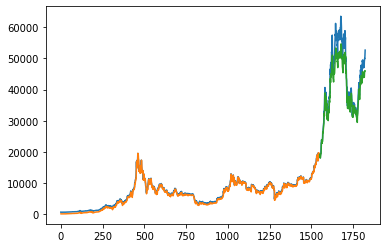

In [9]:
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算得分
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
a = testPredictPlot
plt.show();

[[      nan]
 [      nan]
 [      nan]
 ...
 [46082.84 ]
 [46020.367]
 [      nan]]


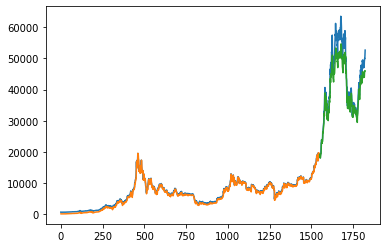

In [10]:

# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
print(testPredictPlot)
plt.show();

In [18]:
def word(s):
    return s[1:len(s)-1]

print(word("[hello]"))
for i in a:
    print(word(str(i)))

hello
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

In [3]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1196, 0.3318, 0.5418],
        [0.3101, 0.7829, 0.3799],
        [0.5570, 0.6090, 0.8415],
        [0.3601, 0.8158, 0.7417],
        [0.1992, 0.5964, 0.4519]])


In [13]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)

1.10.2+cu113
True
2
11.3
